In [2]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import csv
import matplotlib.pyplot as plt

np.random.seed(0)

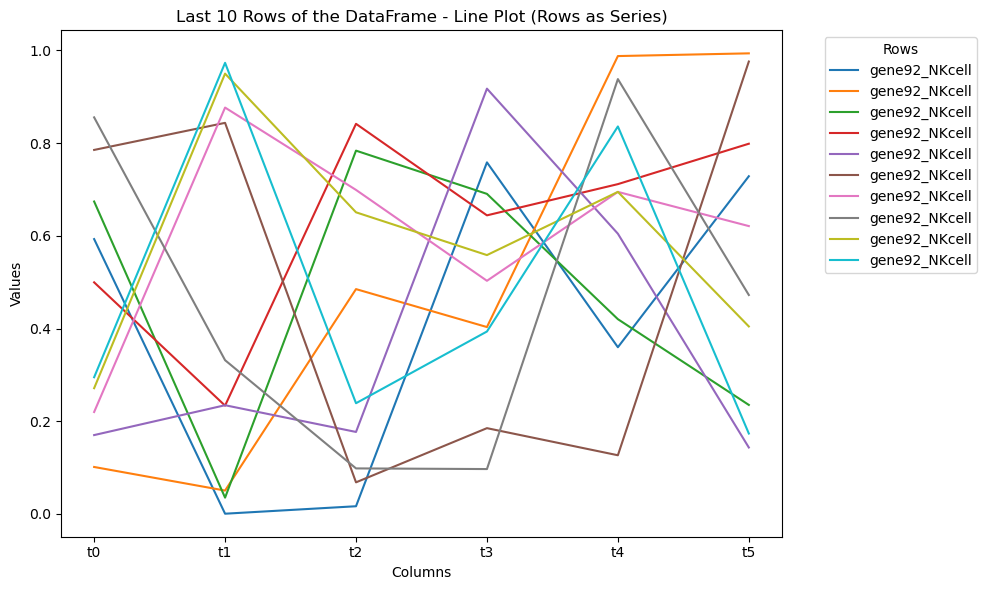

In [26]:
# create fake data for testing with 10 columns name t0, t1, t2, ..., t5
# and 1000 rows with random values between 0 and 1
# and index with the following format: "gene" + "celltype"

n_rows = 1000
n_cols = 6
data = np.random.rand(n_rows, n_cols)
columns = ["t" + str(i) for i in range(n_cols)]
genes = ["gene" + str(i) for i in range(n_rows // 10)] * 10  # Repeat gene names
cell_types = ["Bcell", "Tcell", "NKcell", "Monocyte", "Dendritic"] * (n_rows // 5)
index = [f"{gene}_{cell_type}" for gene, cell_type in zip(genes, cell_types)]

# Add correlated and anticorrelated rows
correlated_data = np.ones((50, n_cols))
anticorrelated_data = 1 - correlated_data  # Anticorrelated patterns
fake_genes = ["gene1"] * 50 + ["gene2"] * 50  # Assign gene1 to correlated and gene2 to anticorrelated
fake_cell_type = "Fakecells"
fake_index = [f"{gene}_{fake_cell_type}" for gene in fake_genes]
fake_data = np.vstack([correlated_data, anticorrelated_data])

# Combine original and fake data
data = np.vstack([data, fake_data])
index.extend(fake_index)

# Create DataFrame
df = pd.DataFrame(data, columns=columns)
df.index = index
# take only rows containing "gene1" and "gene2"
df_short = df[df.index.str.contains("gene92_")]
df.to_csv("gene1_gene2_Fakecells.csv")


# Plot the last 10 rows of the dataframe as a line plot (transpose to plot rows instead of columns)
df_short.T.plot(kind='line', figsize=(10, 6))
plt.title("Last 10 Rows of the DataFrame - Line Plot (Rows as Series)")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.legend(title="Rows", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

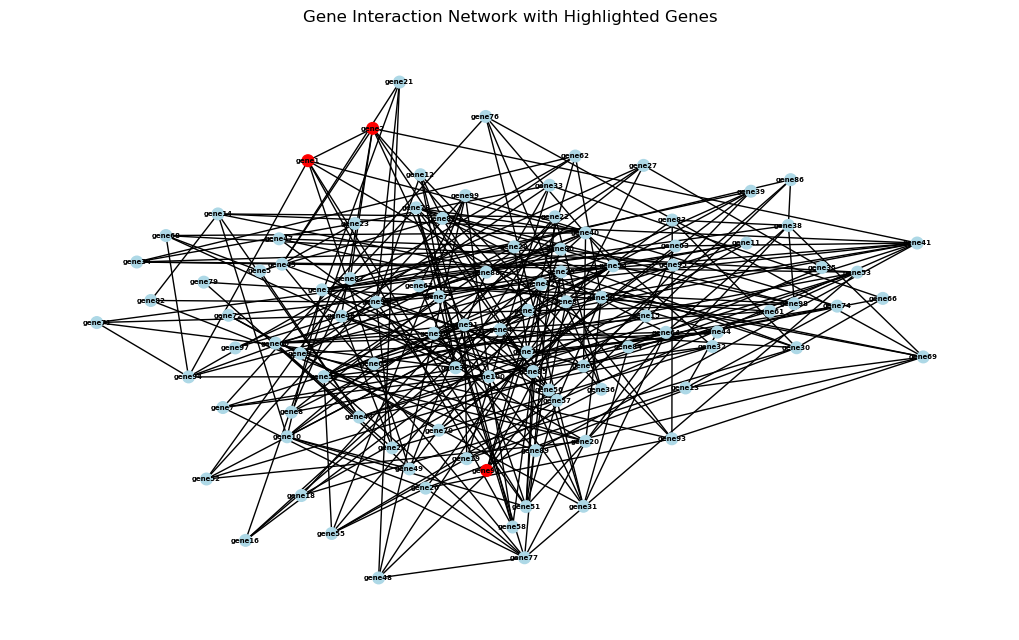

In [27]:
# Number of nodes
gene_count = 100
genes = [f"gene{i}" for i in range(1, gene_count + 1)]

# Create a connected random graph
G = nx.Graph()
G.add_nodes_from(genes)

# Ensure connectivity by creating a spanning tree
nodes = genes[:]
random.shuffle(nodes)
for i in range(len(nodes) - 1):
    G.add_edge(nodes[i], nodes[i + 1])

# Add more random edges to simulate interactions
extra_edges = random.randint(gene_count, 2 * gene_count)  # Random additional edges
for _ in range(extra_edges):
    u, v = random.sample(genes, 2)
    G.add_edge(u, v)

# Add specific edges to create a specific structure
G.add_edge("gene1", "gene2")

# Write edges to CSV
with open("gene1_gene2_Fakecells_ppi.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile, delimiter="\t")
  writer.writerow(["gene1", "gene2"])
  for edge in G.edges():
    writer.writerow([edge[0], edge[1]])

# Highlight 3 genes in the graph
highlight_genes = ["gene1", "gene2", "gene92"]
node_colors = ["red" if node in highlight_genes else "lightblue" for node in G.nodes]

# Plot the graph with highlighted genes
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=70, node_color=node_colors, font_size=5, font_weight="bold")
plt.title("Gene Interaction Network with Highlighted Genes")
plt.show()